In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
stores_df = pd.read_csv('./data/stores.csv')
features_df = pd.read_csv('./data/features.csv')
train_df = pd.read_csv('./data/train.csv')

merged_df = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
merged_df = pd.merge(merged_df, stores_df, on='Store', how='left')

print("Data successfully loaded and merged.")
merged_df.head()

Data successfully loaded and merged.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [3]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)

weekly_sales = merged_df['Weekly_Sales'].resample('W').sum()

print("Data preprocessed for time series analysis.")
weekly_sales.head()

Data preprocessed for time series analysis.


Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

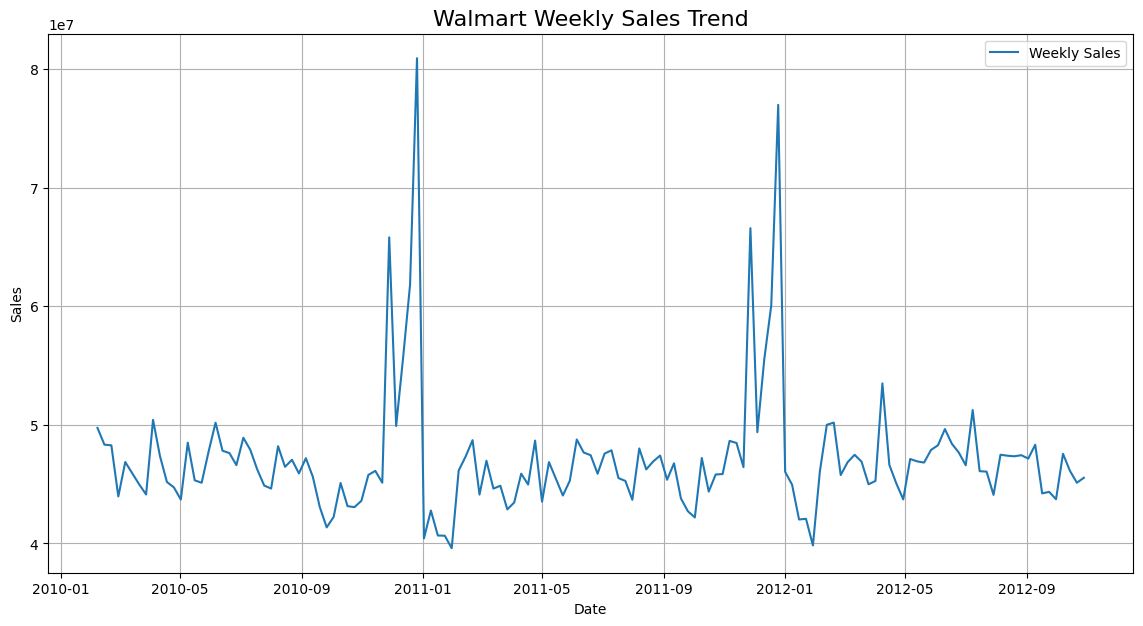

In [4]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales.index, weekly_sales.values, label='Weekly Sales')
plt.title('Walmart Weekly Sales Trend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

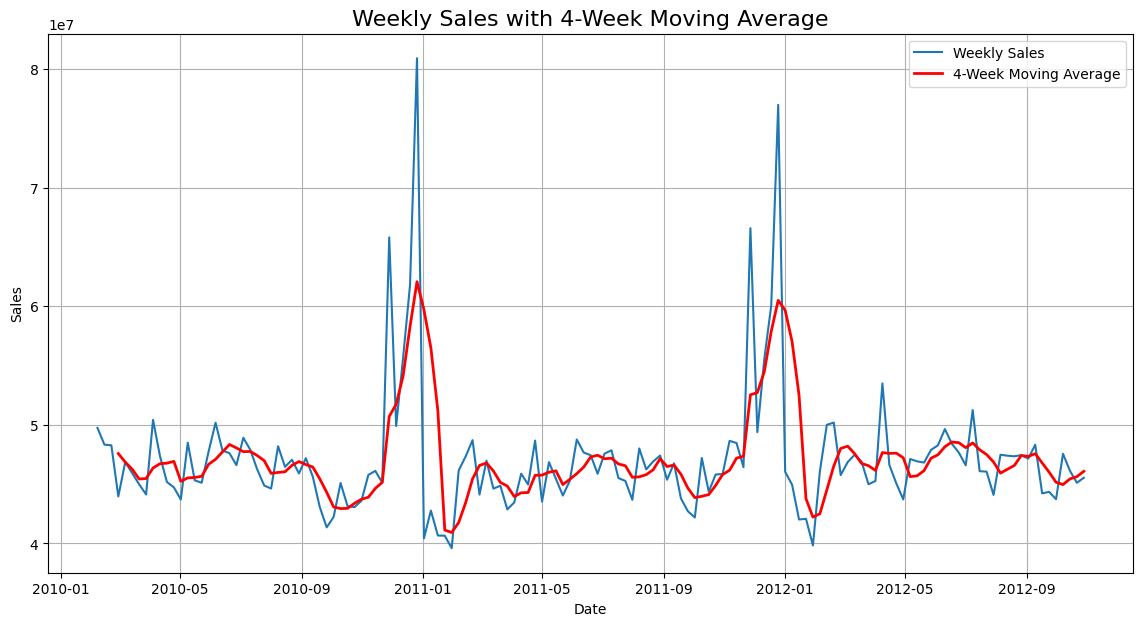

In [5]:
moving_avg = weekly_sales.rolling(window=4).mean()

plt.figure(figsize=(14, 7))
plt.plot(weekly_sales.index, weekly_sales.values, label='Weekly Sales')
plt.plot(moving_avg.index, moving_avg.values, label='4-Week Moving Average', color='red', linewidth=2)
plt.title('Weekly Sales with 4-Week Moving Average', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

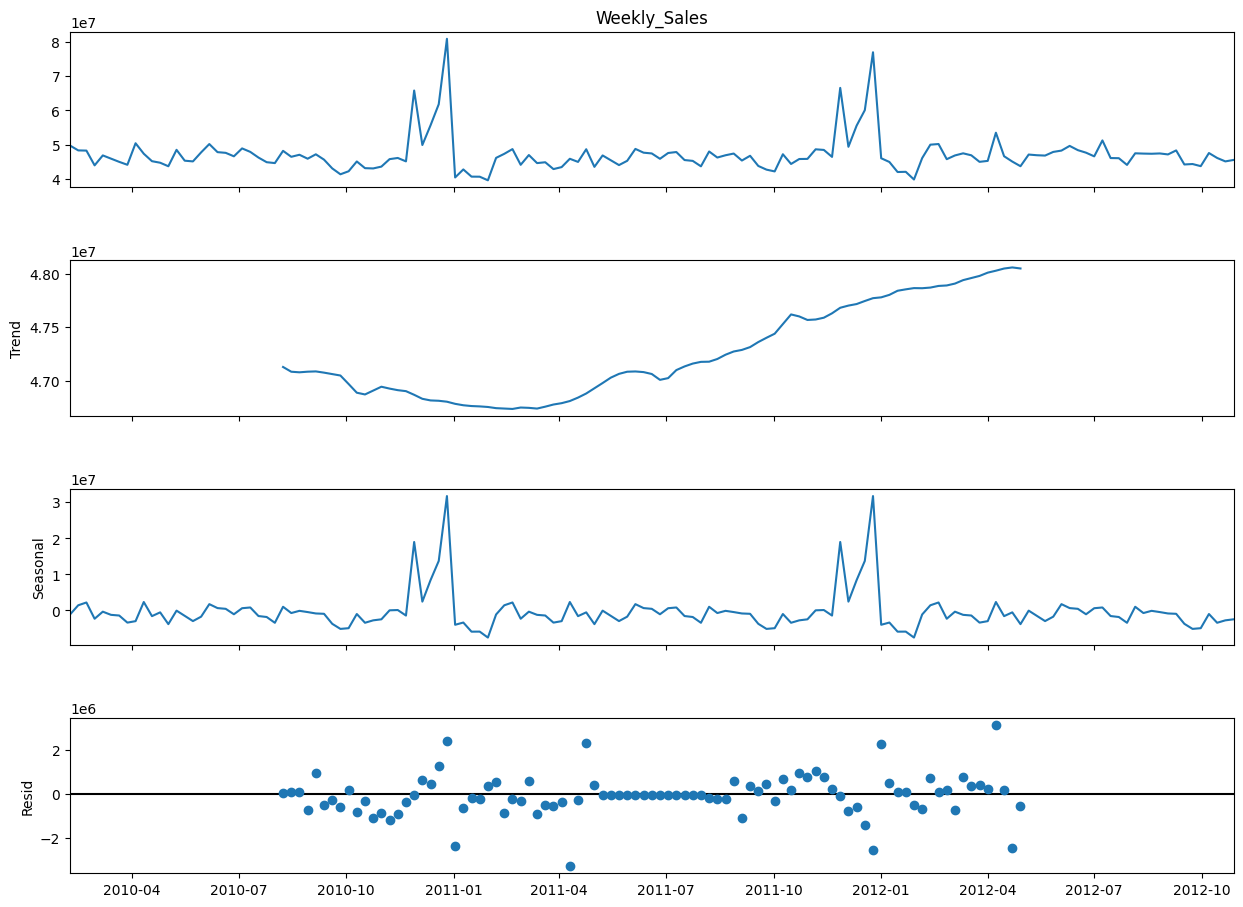

In [6]:
decomposition = seasonal_decompose(weekly_sales, model='additive')

fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

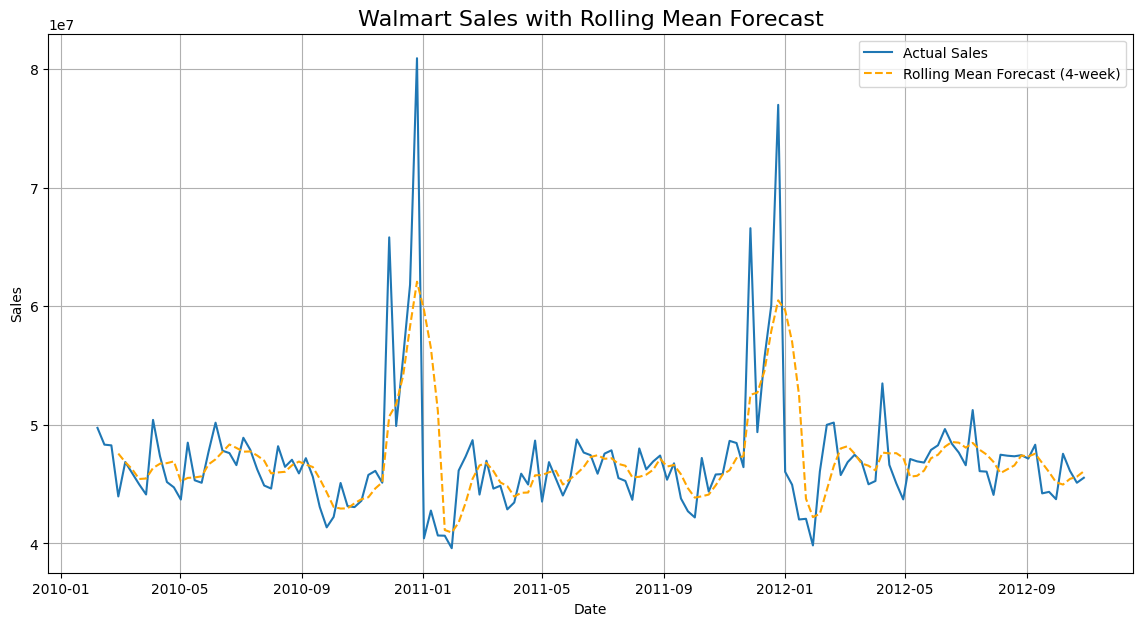

In [7]:
rolling_mean_forecast = weekly_sales.rolling(window=4).mean()

plt.figure(figsize=(14, 7))
plt.plot(weekly_sales.index, weekly_sales.values, label='Actual Sales')
plt.plot(rolling_mean_forecast.index, rolling_mean_forecast.values, label='Rolling Mean Forecast (4-week)', color='orange', linestyle='--')
plt.title('Walmart Sales with Rolling Mean Forecast', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()